# Precision-Driven Customer Churn Analysis

### 1. Installing and Importing Libraries

In [1]:
pip install catboost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

### 2. Connecting to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Loading the Dataset and Preprocessing the Data

In [4]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Customer_Churn.csv')

In [5]:
# Data preprocessing
target_variable = 'churn'
features = df.drop(target_variable, axis=1)
features = pd.get_dummies(features)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)

In [7]:
# Build the CatBoost model
model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train, y_train)

### 4. Making Predictions and Model Evaluation

In [8]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [9]:
# Evaluate the model - Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8715


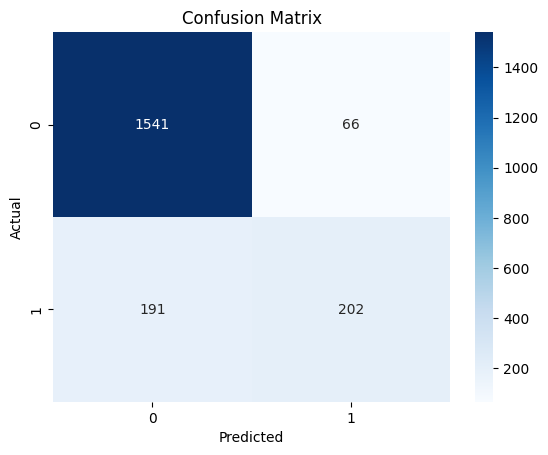

In [10]:
# Evaluate the model - Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Evaluate the model - Classification Report
classification_rep = classification_report(y_test, predictions)
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



AUC-ROC Score: 0.872708617356318


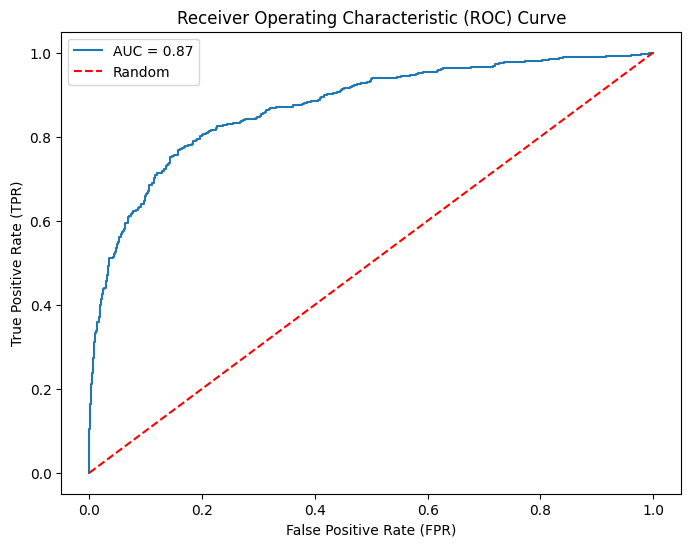

In [12]:
# Evaluate the model - AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"AUC-ROC Score: {roc_auc}")

# Plot AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()